In [56]:
import pandas as pd



data = pd.read_csv("../calculated/sentiment/amazon_sentiment.csv", encoding = 'latin1')
data

,product_name,Num_of_Ratings,Rating,review_title,Review_Text,Helpfulness,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,sentiment_score_discrete,arousal
0,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,5,It's a good product,This radio was perfect for my father. He's ol...,0,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,5,-0.364289
1,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,1,nothing came in?,"I couldn't get any stations in , worthless to ...",0,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,1,-0.078554
2,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,3,Great for basement or garage use.,This affordable radio is perfect for my needs....,1,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,4,0.099952
3,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,5,Surprise!,Surprisingly wonderful little radio. Just wha...,0,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,5,0.378918
4,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,4,Fair to good reception,Very good portable radio. Great size. Fair to ...,0,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,4,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Great iPad cover at an economical price!,Its very sturdy protective! Easy to position ...,0,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,5,0.005940
89923,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Best iPad case,"Nothing to dislike. Excellent quality, easy to...",0,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,5,0.102818
89924,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Durable cover for iPad!,Love this product. Color is pretty.Easy to hol...,0,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,5,0.084424
89925,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Worth it,Quick shipping. Fits ipad easily. Nice colors.,0,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,5,0.056716


In [57]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler


# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
print("제거된 열:", removed_columns)

# object 타입 변수 제거
data_cleaned = data.select_dtypes(exclude=['object'])

data_cleaned

제거된 열: ['product_name', 'review_title', 'Review_Text']


,Num_of_Ratings,Rating,Helpfulness,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,sentiment_score_discrete,arousal
0,27618,5,0,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,5,-0.364289
1,27618,1,0,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,1,-0.078554
2,27618,3,1,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,4,0.099952
3,27618,5,0,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,5,0.378918
4,27618,4,0,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,4,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,43430,5,0,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,5,0.005940
89923,43430,5,0,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,5,0.102818
89924,43430,5,0,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,5,0.084424
89925,43430,5,0,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,5,0.056716


KMO Test: 0.6923894087096513, Bartlett’s Test p-value: 0.0

요인 부하량 (Factor Loadings):
                                  0         1
Num_of_Ratings             0.013475 -0.038632
Rating                     0.936611 -0.074319
Helpfulness               -0.033508  0.096276
is_photo                  -0.014293  0.104451
price                     -0.013890  0.093029
time_elapsed               0.068743 -0.034595
Average_Rating             0.228142 -0.051845
title_length              -0.136234  0.206578
text_length               -0.133459  0.438503
Deviation of star ratings -0.894588  0.062055
FOG Index                  0.045258  0.585602
Flesch Reading Ease       -0.039668 -0.537082
depth                      0.112854  0.539297
breadth                    0.063416 -0.641166
valence                    0.943694 -0.094635
sentiment_score_discrete   0.915828 -0.089271
arousal                    0.149018  0.017847

공통성 (Communalities):
                           Communality
Num_of_Ratings           

/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


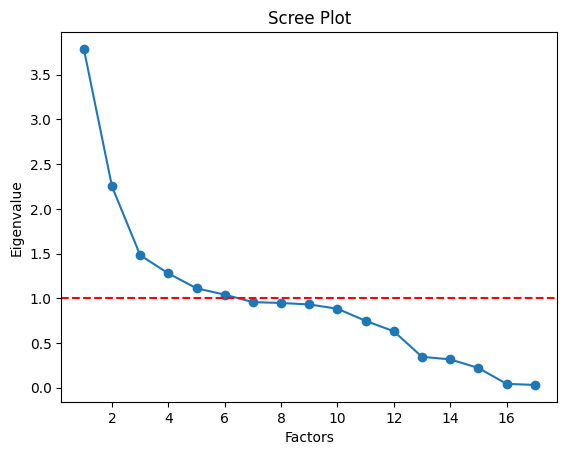

In [58]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)

# 공통성(Communalities) 출력 → 변수들이 요인에 의해 얼마나 설명되는지
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities)

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()

# Min-Max로 스케일링 변경

In [1]:
import pandas as pd



data = pd.read_csv("../calculated/sentiment/amazon_sentiment.csv", encoding = 'latin1')
data

c:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,product_name,Num_of_Ratings,Rating,review_title,Review_Text,Helpfulness,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,sentiment_score_discrete,arousal
0,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,5,It's a good product,This radio was perfect for my father. He's ol...,0,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,5,-0.364289
1,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,1,nothing came in?,"I couldn't get any stations in , worthless to ...",0,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,1,-0.078554
2,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,3,Great for basement or garage use.,This affordable radio is perfect for my needs....,1,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,4,0.099952
3,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,5,Surprise!,Surprisingly wonderful little radio. Just wha...,0,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,5,0.378918
4,"Panasonic Portable AM / FM Radio, Battery Oper...",27618,4,Fair to good reception,Very good portable radio. Great size. Fair to ...,0,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,4,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Great iPad cover at an economical price!,Its very sturdy protective! Easy to position ...,0,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,5,0.005940
89923,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Best iPad case,"Nothing to dislike. Excellent quality, easy to...",0,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,5,0.102818
89924,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Durable cover for iPad!,Love this product. Color is pretty.Easy to hol...,0,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,5,0.084424
89925,Fintie Case for iPad 9.7 2018 2017 / iPad Air ...,43430,5,Worth it,Quick shipping. Fits ipad easily. Nice colors.,0,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,5,0.056716


In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler


# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
print("제거된 열:", removed_columns)

# object 타입 변수 제거
data_cleaned = data.select_dtypes(exclude=['object'])

data_cleaned

제거된 열: ['product_name', 'review_title', 'Review_Text']


,Num_of_Ratings,Rating,Helpfulness,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,sentiment_score_discrete,arousal
0,27618,5,0,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,5,-0.364289
1,27618,1,0,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,1,-0.078554
2,27618,3,1,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,4,0.099952
3,27618,5,0,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,5,0.378918
4,27618,4,0,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,4,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,43430,5,0,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,5,0.005940
89923,43430,5,0,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,5,0.102818
89924,43430,5,0,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,5,0.084424
89925,43430,5,0,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,5,0.056716


c:\Users\Administrator\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Test: 0.6923894087096503, Bartlett’s Test p-value: 0.0

요인 부하량 (Factor Loadings):
                                  0         1
Num_of_Ratings             0.015787 -0.064923
Rating                     0.942903 -0.065085
Helpfulness               -0.041268  0.145983
is_photo                  -0.014282  0.158565
price                     -0.013288  0.142967
time_elapsed               0.094147 -0.041853
Average_Rating             0.298537 -0.057649
title_length              -0.172444  0.289994
text_length               -0.157539  0.563146
Deviation of star ratings -0.920257  0.053363
FOG Index                  0.060192  0.687350
Flesch Reading Ease       -0.056336 -0.644131
depth                      0.138849  0.641640
breadth                    0.071656 -0.717904
valence                    0.946909 -0.081124
sentiment_score_discrete   0.931688 -0.076786
arousal                    0.198533  0.046002

공통성 (Communalities):
                           Communality
Num_of_Ratings           

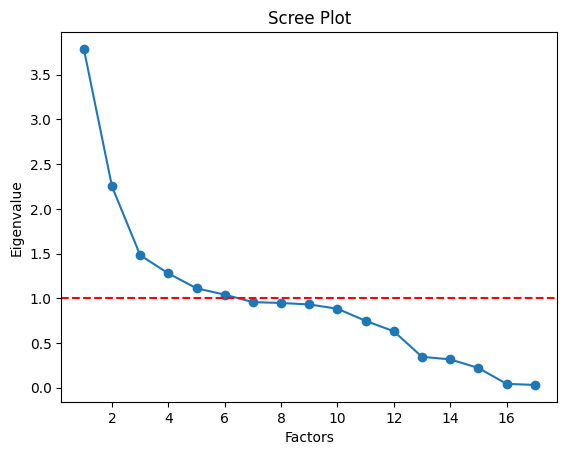

In [8]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# 데이터 표준화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method="principal")
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)

# 공통성(Communalities) 출력 → 변수들이 요인에 의해 얼마나 설명되는지
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities)

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)

# 공통성(Communalities) 출력 → 변수들이 요인에 의해 얼마나 설명되는지
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities)

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()